In [1]:
import os.path as osp
import matplotlib.pyplot as plt
import cv2
import torch
from nuscenes.nuscenes import NuScenes
from nuscenes.utils.data_classes import RadarPointCloud

/usr/lib/python3/dist-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.17.3 and <1.25.0 is required for this version of SciPy (detected version 1.26.1
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


#### Load the nuScenes dataset (mini-split, in this case).

In [2]:
nusc = NuScenes(version='v1.0-mini', dataroot='./data/sets/nuscenes', verbose=False)

In [3]:
len(nusc.sample)

404

#### Extract RADAR point cloud from dataset

In [4]:
radar_dataset = []
front_cam_images_datapath = []
for i in range(404):
    sample_record = nusc.sample[i]
    pointsensor_token = sample_record['data']['RADAR_FRONT']
    pointsensor = nusc.get('sample_data', pointsensor_token)
    pcl_path = osp.join(nusc.dataroot, pointsensor['filename'])
    
    pc = RadarPointCloud.from_file(pcl_path)
    pc = pc.points.T
    radar_xy = [[item[0],item[1]] for item in pc]
    radar_dataset.append(radar_xy)
    # print(pc.shape)  # shape: (N, 18), where N is the number of radar points

    my_sample = nusc.get('sample', sample_record['token'])
    sensor = 'CAM_FRONT'
    cam_front_data = nusc.get('sample_data', my_sample['data'][sensor])
    data_path, boxes, camera_intrinsic = nusc.get_sample_data(cam_front_data['token'])
    # img = cv2.imread(data_path)
    front_cam_images_datapath.append(data_path)

#### Extract bounding box using YOLO

In [5]:
## Extract bounding boxes using YOLOv8
from ultralytics import YOLO
# Load a model
model = YOLO("yolov8n.yaml")  # build a new model from scratch
model = YOLO("yolov8n.pt")  # load a pretrained model (recommended for training)

# Use the model
model.train(data="coco128.yaml", epochs=3)  # train the model
metrics = model.val()  # evaluate model performance on the validation set


                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics.nn.modules.conv.Conv             [128

train: Scanning /home/rahman2/CMPE691_CV/Project/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0
val: Scanning /home/rahman2/CMPE691_CV/Project/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 c


Plotting labels to runs/detect/train37/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.000119, momentum=0.9) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 8 dataloader workers
Logging results to runs/detect/train37
Starting training for 3 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        1/3      2.55G      1.226      1.615      1.274        178        640: 100%|██████████| 8/8 [00:02<00:00,  3.14i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00

                   all        128        929      0.616      0.555      0.612      0.454



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        2/3      2.54G      1.225      1.513      1.268        231        640: 100%|██████████| 8/8 [00:02<00:00,  3.21i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:01<00

                   all        128        929      0.673      0.543      0.625      0.466



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


        3/3      2.72G      1.209      1.449      1.222        178        640: 100%|██████████| 8/8 [00:02<00:00,  3.86i
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:02<00

                   all        128        929      0.668      0.544       0.63      0.468



3 epochs completed in 0.004 hours.
Optimizer stripped from runs/detect/train37/weights/last.pt, 6.5MB
Optimizer stripped from runs/detect/train37/weights/best.pt, 6.5MB

Validating runs/detect/train37/weights/best.pt...
Ultralytics YOLOv8.0.222 🚀 Python-3.10.12 torch-2.1.0+cu118 CUDA:0 (Tesla T4, 14931MiB)
Model summary (fused): 168 layers, 3151904 parameters, 0 gradients, 8.7 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 4/4 [00:03<00


                   all        128        929       0.67      0.544      0.631      0.469
                person        128        254      0.794      0.668      0.769      0.542
               bicycle        128          6      0.578      0.333      0.328      0.281
                   car        128         46      0.868      0.217      0.286      0.178
            motorcycle        128          5      0.688      0.889      0.898      0.697
              airplane        128          6      0.827        0.8      0.903      0.673
                   bus        128          7      0.689      0.714      0.737      0.649
                 train        128          3      0.554      0.667       0.83      0.731
                 truck        128         12          1      0.365      0.479      0.294
                  boat        128          6      0.292      0.167      0.351      0.221
         traffic light        128         14      0.692      0.165      0.202      0.139
             stop sig

val: Scanning /home/rahman2/CMPE691_CV/Project/datasets/coco128/labels/train2017.cache... 126 images, 2 backgrounds, 0 c
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 8/8 [00:03<00


                   all        128        929      0.656      0.545      0.629      0.469
                person        128        254      0.812      0.678      0.774      0.541
               bicycle        128          6      0.569      0.333      0.327      0.283
                   car        128         46      0.817      0.217      0.285      0.178
            motorcycle        128          5       0.69      0.896      0.898      0.697
              airplane        128          6      0.828      0.805      0.903      0.681
                   bus        128          7      0.683      0.714      0.736      0.648
                 train        128          3       0.55      0.667       0.83      0.731
                 truck        128         12          1      0.377      0.497      0.297
                  boat        128          6      0.262      0.167      0.319      0.155
         traffic light        128         14        0.7      0.171      0.202      0.139
             stop sig

In [6]:
image_dataset_xywh = []
for datapath in front_cam_images_datapath:
    results = model(datapath)  # predict on an image
    for result in results:
        image_xywh = [[float(item[0]),float(item[1]),float(item[2]),float(item[3])] for item in result.boxes.xywh]
        image_dataset_xywh.append(image_xywh)


image 1/1 /home/rahman2/CMPE691_CV/Project/data/sets/nuscenes/samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402927612460.jpg: 384x640 1 person, 4 cars, 1 truck, 50.9ms
Speed: 4.5ms preprocess, 50.9ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/rahman2/CMPE691_CV/Project/data/sets/nuscenes/samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402928112460.jpg: 384x640 1 person, 7 cars, 1 truck, 5.0ms
Speed: 1.4ms preprocess, 5.0ms inference, 1.6ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/rahman2/CMPE691_CV/Project/data/sets/nuscenes/samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402928662460.jpg: 384x640 2 persons, 9 cars, 1 truck, 5.5ms
Speed: 1.6ms preprocess, 5.5ms inference, 1.9ms postprocess per image at shape (1, 3, 384, 640)

image 1/1 /home/rahman2/CMPE691_CV/Project/data/sets/nuscenes/samples/CAM_FRONT/n015-2018-07-24-11-22-45+0800__CAM_FRONT__1532402929162460.jpg: 384x64

In [7]:
# radar_dataset

In [8]:
# image_dataset_xywh[0]

#### Estimate depth using MiDaS

In [9]:
model_type = "DPT_Large"     # MiDaS v3 - Large     (highest accuracy, slowest inference speed)
#model_type = "DPT_Hybrid"   # MiDaS v3 - Hybrid    (medium accuracy, medium inference speed)
#model_type = "MiDaS_small"  # MiDaS v2.1 - Small   (lowest accuracy, highest inference speed)

midas = torch.hub.load("intel-isl/MiDaS", model_type)

Using cache found in /home/rahman2/.cache/torch/hub/intel-isl_MiDaS_master
/home/rahman2/.local/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [10]:
device = torch.device("cuda") if torch.cuda.is_available() else torch.device("cpu")
midas.to(device)
midas.eval()

DPTDepthModel(
  (pretrained): Module(
    (model): VisionTransformer(
      (patch_embed): PatchEmbed(
        (proj): Conv2d(3, 1024, kernel_size=(16, 16), stride=(16, 16))
        (norm): Identity()
      )
      (pos_drop): Dropout(p=0.0, inplace=False)
      (patch_drop): Identity()
      (norm_pre): Identity()
      (blocks): Sequential(
        (0): Block(
          (norm1): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (attn): Attention(
            (qkv): Linear(in_features=1024, out_features=3072, bias=True)
            (q_norm): Identity()
            (k_norm): Identity()
            (attn_drop): Dropout(p=0.0, inplace=False)
            (proj): Linear(in_features=1024, out_features=1024, bias=True)
            (proj_drop): Dropout(p=0.0, inplace=False)
          )
          (ls1): Identity()
          (drop_path1): Identity()
          (norm2): LayerNorm((1024,), eps=1e-06, elementwise_affine=True)
          (mlp): Mlp(
            (fc1): Linear(in_featur

In [11]:
midas_transforms = torch.hub.load("intel-isl/MiDaS", "transforms")

if model_type == "DPT_Large" or model_type == "DPT_Hybrid":
    transform = midas_transforms.dpt_transform
else:
    transform = midas_transforms.small_transform

Using cache found in /home/rahman2/.cache/torch/hub/intel-isl_MiDaS_master


In [12]:
# for i,data_path in enumerate(front_cam_images_datapath):
midas_outputs = []
# for i in range(5):
for i in range(len(front_cam_images_datapath)):
    data_path = front_cam_images_datapath[i]
    # print(data_path)
    img = cv2.imread(data_path)
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    input_batch = transform(img).to(device)
    with torch.no_grad():
        prediction = midas(input_batch)
        prediction = torch.nn.functional.interpolate(
            prediction.unsqueeze(1),
            size=img.shape[:2],
            mode="bicubic",
            align_corners=False,
        ).squeeze()

    output = prediction.cpu().numpy()
    midas_outputs.append(output)

In [13]:
# depth_values = []
num_bboxes = []
image_dataset_xywhd = []
# for i in range(5):
for i in range(len(front_cam_images_datapath)):
    depth_image = midas_outputs[i]
    temp_image_xywh = image_dataset_xywh[i]
    image_xywhd = []
    num_bboxes.append(len(temp_image_xywh))
    for xy in temp_image_xywh:
        # print(xy,i)
        center_x = int(xy[0])
        center_y = int(xy[1])
        depth = depth_image[center_y,center_x]
        image_xywhd.append([xy[0],xy[1],xy[2],xy[3],depth])
    image_dataset_xywhd.append(image_xywhd)

In [14]:
# num_bboxes

In [15]:
### Sort the bboxes w.r.t depth
image_dataset_xywh_sorted = []
for i in range(len(front_cam_images_datapath)):
    image_xywhd = image_dataset_xywhd[i]
    # print(image_xywhd)
    image_xywhd_sorted = sorted(image_xywhd,key=lambda x:x[4])
    # print(image_xywhd_sorted)
    ## Remove the depth entry
    image_xywh_sorted = []
    for item in image_xywhd_sorted:
        # image_xywh_sorted.append(item[:-1])
        image_dataset_xywh_sorted.append(item[:-1])

#### Cluster the radar point clouds with K-means

In [16]:
# len(radar_dataset[0])

In [17]:
from sklearn.cluster import KMeans
import numpy as np

In [18]:
radar_dataset_xy_kmeans = []
# for i in range(3):
for i in range(len(front_cam_images_datapath)):
    if num_bboxes[i]>0:
        n_clusters = num_bboxes[i]
    # else:
    #     n_clusters = 1
        radar_xy = radar_dataset[i]
        kmeans = KMeans(n_clusters=n_clusters, random_state=0) 
        kmeans.fit(radar_xy)
        kmeans_radar_xy = kmeans.cluster_centers_
        radar_dataset_xy_kmeans.append(kmeans_radar_xy)

In [19]:
## Compute radar distance 

In [20]:
radar_dataset_xyd_kmeans = []
# for i in range(3):
for i in range(len(radar_dataset_xy_kmeans)):
    kmeans_radar_xy = radar_dataset_xy_kmeans[i]
    kmeans_radar_xyd = []
    for xy in kmeans_radar_xy:
        # print(xy)
        dist = np.sqrt(xy[0]**2+xy[1]**2)
        kmeans_radar_xyd.append([xy[0],xy[1],dist])
    radar_dataset_xyd_kmeans.append(kmeans_radar_xyd)

In [21]:
# radar_dataset_xyd_kmeans

In [22]:
## Sort radar point clouds w.r.t distance
radar_dataset_xy_sorted = []
# for i in range(3):
for i in range(len(radar_dataset_xyd_kmeans)):
    radar_xyd = radar_dataset_xyd_kmeans[i]
    radar_xyd_sorted = sorted(radar_xyd,key=lambda x:x[2],reverse=True)
    ## Remove the depth entry
    radar_xy_sorted = []
    for item in radar_xyd_sorted:
        # radar_xy_sorted.append(item[:-1])
        radar_dataset_xy_sorted.append(item[:-1])

In [23]:
# radar_dataset_xy_sorted

In [24]:
from torch.utils.data import TensorDataset, DataLoader, random_split

radar_data = np.array(radar_dataset_xy_sorted)
image_data = np.array(image_dataset_xywh_sorted)

radar_data_tensor = torch.Tensor(radar_data) # transform to torch tensor
image_data_tensor = torch.Tensor(image_data)

dataset = TensorDataset(radar_data_tensor,image_data_tensor) # create your datset
# dataloader = DataLoader(dataset) # create your dataloader

In [25]:
train_size = int(0.8 * len(dataset))
test_size = len(dataset) - train_size
train_dataset, test_dataset = random_split(dataset, [train_size, test_size])

In [26]:
train_loader = DataLoader(train_dataset)
test_loader = DataLoader(test_dataset)
len(dataset),len(train_loader),len(test_loader)

(3215, 2572, 643)

In [27]:
class AE(torch.nn.Module):
	def __init__(self):
		super().__init__()
		
		# Building an linear encoder with Linear
		# layer followed by Relu activation function
		# 784 ==> 9
		self.encoder = torch.nn.Sequential(
			torch.nn.Linear(2,1),
			torch.nn.ReLU(),
			torch.nn.Linear(1,16),
			torch.nn.ReLU(),
			torch.nn.Linear(16,32),
			torch.nn.ReLU(),
			torch.nn.Linear(32,64),
			torch.nn.ReLU(),
			torch.nn.Linear(64,80)
		)
		
		# Building an linear decoder with Linear
		# layer followed by Relu activation function
		# The Sigmoid activation function
		# outputs the value between 0 and 1
		# 9 ==> 784
		self.decoder = torch.nn.Sequential(
			torch.nn.Linear(80,64),
			torch.nn.ReLU(),
			torch.nn.Linear(64,32),
			torch.nn.ReLU(),
			torch.nn.Linear(32,16),
			torch.nn.ReLU(),
			torch.nn.Linear(16,2),
			torch.nn.ReLU(),
			torch.nn.Linear(2,4)
			# torch.nn.Sigmoid()
		)

	def forward(self, x):
		encoded = self.encoder(x)
		decoded = self.decoder(encoded)
		return decoded

In [28]:
# Model Initialization
model = AE()

# Validation using MSE Loss function
# loss_function = torch.nn.MSELoss()
loss_function = torch.nn.CrossEntropyLoss()

# Using an Adam Optimizer with lr = 0.1
optimizer = torch.optim.Adam(model.parameters(),
							lr = 1e-1,
							weight_decay = 1e-8)

In [29]:
epochs = 20
train_losses = []
test_losses = []
for epoch in range(epochs):
    ## Train model
    i = 0
    train_loss = 0
    model.train()
    for (radar_xy,image_xy) in train_loader:
        # Output of Autoencoder
        reconstructed = model(radar_xy)
        # Calculating the loss function
        loss = loss_function(reconstructed, image_xy)
        # The gradients are set to zero,
        # the gradient is computed and stored.
        # .step() performs parameter update
        loss.backward()
        optimizer.zero_grad()
        optimizer.step()
        
        i += 1
        train_loss += loss.detach().numpy()
    print(f"Epoch:{epoch} Frames:{i} Training loss:{loss}")
    train_losses.append(train_loss)
    ## Test model
    model.eval()
    i = 0
    test_loss = 0
    with torch.no_grad():
        for (radar_xy,image_xy) in test_loader:
            reconstructed = model(radar_xy)
            loss = loss_function(reconstructed, image_xy)
            i += 1
            test_loss += loss.detach().numpy()
        print(f"Epoch:{epoch} Frames:{i} Testing loss:{loss}")
        test_losses.append(test_loss)

Epoch:0 Frames:2572 Training loss:1086.760009765625
Epoch:0 Frames:643 Testing loss:1912.052490234375
Epoch:1 Frames:2572 Training loss:1086.760009765625
Epoch:1 Frames:643 Testing loss:1912.052490234375
Epoch:2 Frames:2572 Training loss:1086.760009765625
Epoch:2 Frames:643 Testing loss:1912.052490234375
Epoch:3 Frames:2572 Training loss:1086.760009765625
Epoch:3 Frames:643 Testing loss:1912.052490234375
Epoch:4 Frames:2572 Training loss:1086.760009765625
Epoch:4 Frames:643 Testing loss:1912.052490234375
Epoch:5 Frames:2572 Training loss:1086.760009765625
Epoch:5 Frames:643 Testing loss:1912.052490234375
Epoch:6 Frames:2572 Training loss:1086.760009765625
Epoch:6 Frames:643 Testing loss:1912.052490234375
Epoch:7 Frames:2572 Training loss:1086.760009765625
Epoch:7 Frames:643 Testing loss:1912.052490234375
Epoch:8 Frames:2572 Training loss:1086.760009765625
Epoch:8 Frames:643 Testing loss:1912.052490234375
Epoch:9 Frames:2572 Training loss:1086.760009765625
Epoch:9 Frames:643 Testing los

#### Plot training and testing loss

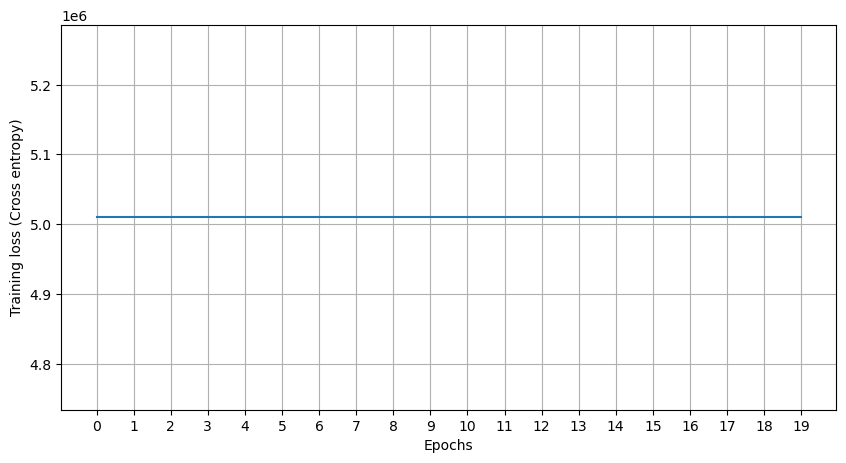

In [30]:
plt.figure(figsize=(10,5))
plt.plot(train_losses)
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Training loss (Cross entropy)")
plt.xticks(np.arange(epochs))
plt.show()

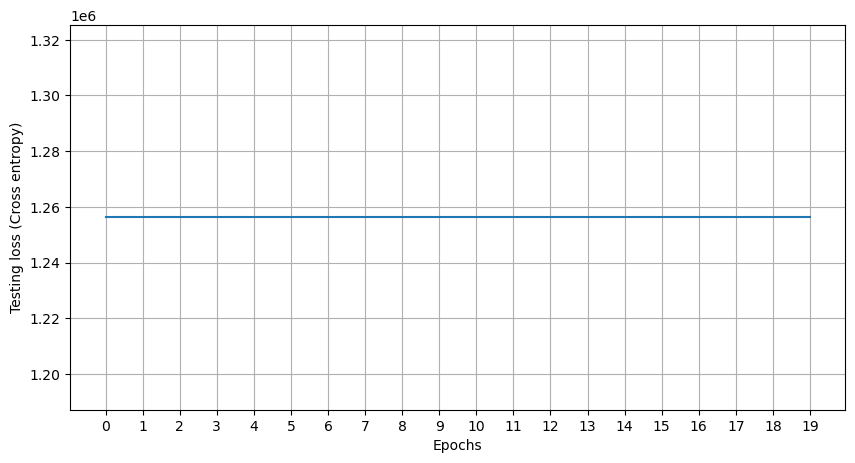

In [31]:
plt.figure(figsize=(10,5))
plt.plot(test_losses)
plt.grid()
plt.xlabel("Epochs")
plt.ylabel("Testing loss (Cross entropy)")
plt.xticks(np.arange(epochs))
plt.show()